# US Federal Public Debt and Federal Annual Tax Revenue
This notebook looks at the evolution of US Federal Public Debt as percentage of GDP as well as as percentage of  Federal annual tax revenue.

In [1]:
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas_datareader.data as web
from datetime import date

In [2]:
report_start = date.fromisoformat('1969-01-01')
report_end = date.fromisoformat('2022-07-01')

In [3]:
# GFDEBTN         -- Federal Debt: Total Public Debt in millions (quarterly frequency)
# W006RC1Q027SBEA -- Federal government current tax receipts in billions (quarterly frequency)
# GFDEGDQ188S     -- Federal Debt: Total Public Debt as Percent of Gross Domestic Product
fred_pub_debt_and_tax_rev = web.get_data_fred(['GFDEBTN', 'W006RC1Q027SBEA', 'GFDEGDQ188S'], start=report_start, end=report_end)

# Converting current tax receipts to millions
fred_pub_debt_and_tax_rev.W006RC1Q027SBEA *= 1000 

# Converting current tax recepits from quarterly to annual (trailing 4 quarters)
fred_pub_debt_and_tax_rev.W006RC1Q027SBEA = fred_pub_debt_and_tax_rev.W006RC1Q027SBEA.rolling(4).sum()

fred_pub_debt_and_tax_rev = fred_pub_debt_and_tax_rev.loc['1970':]

In [4]:
FEDERAL_DEBT = 'Federal Debt'
FEDERAL_DEBT_TO_GDP = 'Federal Debt as Percent of GDP'
FEDERAL_TAX_REVENUE = 'Federal Annual Tax Revenue'
FEDERAL_DEBT_TO_TAX = 'Federal Debt as Percent of Annual Tax Revenue'

In [5]:
fred_pub_debt_and_tax_rev[FEDERAL_DEBT_TO_TAX] = fred_pub_debt_and_tax_rev.GFDEBTN / fred_pub_debt_and_tax_rev.W006RC1Q027SBEA * 100

In [6]:
fred_pub_debt_and_tax_rev.rename(
    columns={'GFDEBTN': FEDERAL_DEBT, 'W006RC1Q027SBEA': FEDERAL_TAX_REVENUE,
             'GFDEGDQ188S': FEDERAL_DEBT_TO_GDP},
    inplace=True)

In [7]:
fred_pub_debt_and_tax_rev

,Federal Debt,Federal Annual Tax Revenue,Federal Debt as Percent of GDP,Federal Debt as Percent of Annual Tax Revenue
DATE,,,,
1970-01-01,372007.0,564532.0,35.38879,65.896530
1970-04-01,370094.0,556340.0,34.67329,66.522990
1970-07-01,378678.0,547488.0,34.86717,69.166447
1970-10-01,389158.0,537720.0,35.74822,72.371866
1971-01-01,391668.0,535220.0,34.50345,73.178880
...,...,...,...,...
2021-01-01,28132570.0,8406102.0,127.65351,334.668435
2021-04-01,28529436.0,8921044.0,125.45397,319.799297
2021-07-01,28428919.0,9394235.0,122.52606,302.620905


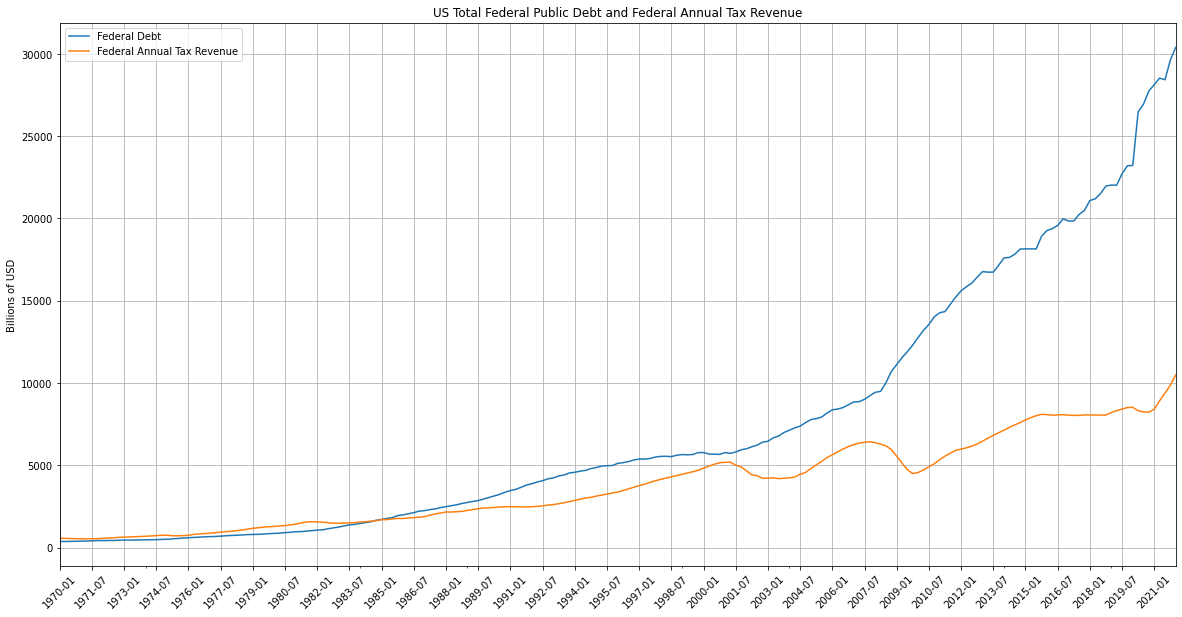

In [8]:
ax = fred_pub_debt_and_tax_rev[[FEDERAL_DEBT, FEDERAL_TAX_REVENUE]].plot(figsize=(20,10), grid=True,
                     title='US Total Federal Public Debt and Federal Annual Tax Revenue',
                     ylabel="Billions of USD",
                     xticks=fred_pub_debt_and_tax_rev.index[::6], xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "%.0f" % (x/1000)))
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), fred_pub_debt_and_tax_rev.index[::6])))

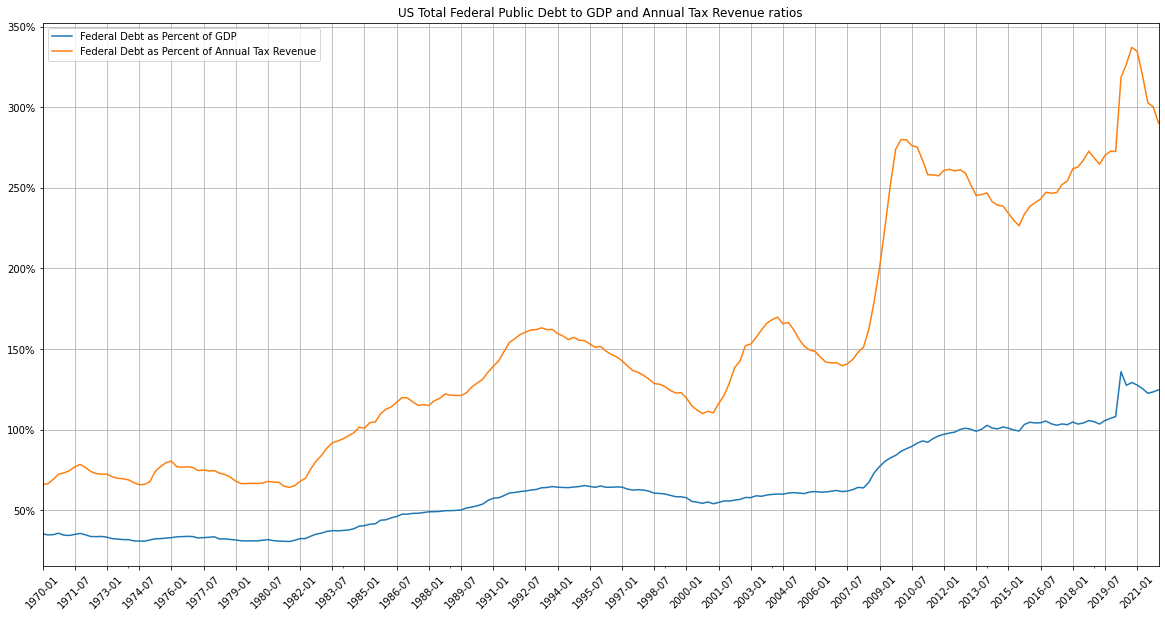

In [9]:
ax = fred_pub_debt_and_tax_rev[[FEDERAL_DEBT_TO_GDP, FEDERAL_DEBT_TO_TAX]].plot(figsize=(20,10), grid=True,
                     title='US Total Federal Public Debt to GDP and Annual Tax Revenue ratios',
                     xticks=fred_pub_debt_and_tax_rev.index[::6], xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), fred_pub_debt_and_tax_rev.index[::6])))